In [ ]:
  import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import json


In [ ]:
df = pd.read_csv("penyakitumum.csv")
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Allergy,continuous_sneezing,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allergy,continuous_sneezing,shivering,chills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Allergy,continuous_sneezing,shivering,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Allergy,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,prominent_veins_on_calf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Varicose veins,fatigue,cramps,bruising,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna("none", inplace=True)

In [ ]:
all_symptoms = set()
for col in df.columns[1:]:  # Lewati kolom 'Disease'
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

[' swollen_legs',
 ' throat_irritation',
 ' pain_behind_the_eyes',
 ' belly_pain',
 ' bladder_discomfort',
 ' joint_pain',
 ' mild_fever',
 ' bruising',
 ' blurred_and_distorted_vision',
 ' fatigue',
 ' shivering',
 ' toxic_look_(typhos)',
 ' swollen_blood_vessels',
 ' yellowing_of_eyes',
 ' sweating',
 ' runny_nose',
 ' loss_of_smell',
 ' malaise',
 ' breathlessness',
 ' headache',
 ' high_fever',
 ' irritability',
 ' visual_disturbances',
 ' obesity',
 ' burning_micturition',
 ' back_pain',
 ' depression',
 ' phlegm',
 ' blood_in_sputum',
 ' watering_from_eyes',
 ' diarrhoea',
 ' sinus_pressure',
 ' altered_sensorium',
 ' family_history',
 ' redness_of_eyes',
 ' chest_pain',
 ' swelled_lymph_nodes',
 ' nausea',
 ' abdominal_pain',
 ' prominent_veins_on_calf',
 ' continuous_sneezing',
 ' foul_smell_of urine',
 ' excessive_hunger',
 ' loss_of_appetite',
 ' continuous_feel_of_urine',
 ' rusty_sputum',
 ' muscle_pain',
 ' stiff_neck',
 ' chills',
 ' weight_loss',
 ' mucoid_sputum',
 ' vo

In [ ]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_symptoms = set()
for col in df.columns[1:]:  # Lewati kolom 'Disease'
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

<ipython-input-5-72e3f795994c>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


['rusty_sputum',
 'high_fever',
 'yellowing_of_eyes',
 'blurred_and_distorted_vision',
 'skin_rash',
 'runny_nose',
 'depression',
 'irritability',
 'obesity',
 'constipation',
 'belly_pain',
 'malaise',
 'foul_smell_of urine',
 'nausea',
 'blood_in_sputum',
 'continuous_sneezing',
 'bruising',
 'continuous_feel_of_urine',
 'fast_heart_rate',
 'burning_micturition',
 'watering_from_eyes',
 'loss_of_appetite',
 'fatigue',
 'chills',
 'weakness_of_one_body_side',
 'joint_pain',
 'congestion',
 'headache',
 'stiff_neck',
 'breathlessness',
 'muscle_pain',
 'mild_fever',
 'red_spots_over_body',
 'pain_behind_the_eyes',
 'chest_pain',
 'altered_sensorium',
 'excessive_hunger',
 'shivering',
 'vomiting',
 'throat_irritation',
 'swelled_lymph_nodes',
 'cough',
 'diarrhoea',
 'toxic_look_(typhos)',
 'redness_of_eyes',
 'abdominal_pain',
 'visual_disturbances',
 'cramps',
 'acidity',
 'sweating',
 'back_pain',
 'loss_of_smell',
 'mucoid_sputum',
 'swollen_blood_vessels',
 'prominent_veins_on_ca

In [ ]:
all_symptoms = sorted(all_symptoms)
all_symptoms

['abdominal_pain',
 'acidity',
 'altered_sensorium',
 'back_pain',
 'belly_pain',
 'bladder_discomfort',
 'blood_in_sputum',
 'blurred_and_distorted_vision',
 'breathlessness',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'depression',
 'diarrhoea',
 'excessive_hunger',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'indigestion',
 'irritability',
 'joint_pain',
 'loss_of_appetite',
 'loss_of_smell',
 'malaise',
 'mild_fever',
 'mucoid_sputum',
 'muscle_pain',
 'nausea',
 'obesity',
 'pain_behind_the_eyes',
 'phlegm',
 'prominent_veins_on_calf',
 'red_spots_over_body',
 'redness_of_eyes',
 'runny_nose',
 'rusty_sputum',
 'shivering',
 'sinus_pressure',
 'skin_rash',
 'stiff_neck',
 'sweating',
 'swelled_lymph_nodes',
 'swollen_blood_vessels',
 'swollen_legs',
 'throat_irritation',
 'toxic_look_(typhos)',
 '

In [ ]:
jumlah_symptoms = len(all_symptoms)
print(f"Jumlah gejala unik: {jumlah_symptoms}")

Jumlah gejala unik: 62


In [ ]:
def augment_data(df, num_augmented_samples=100):
    augmented_data = []
    diseases = df["Disease"].unique()
    for disease in diseases:
        disease_rows = df[df["Disease"] == disease]
        disease_symptoms = set()
        for _, row in disease_rows.iterrows():
            for col in df.columns[1:]:
                if row[col] != "none":
                    disease_symptoms.add(row[col])
        disease_symptoms = list(disease_symptoms - {"none"})
        for _ in range(num_augmented_samples):
            num_symptoms = random.randint(1, min(len(disease_symptoms), 16))
            selected_symptoms = random.sample(disease_symptoms, num_symptoms)
            new_row = {"Disease": disease}
            for i in range(1, 17):
                new_row[f"Symptom_{i}"] = "none"
            for i, symptom in enumerate(selected_symptoms, 1):
                if i <= 16:
                    new_row[f"Symptom_{i}"] = symptom
            augmented_data.append(new_row)
    return pd.DataFrame(augmented_data)

# Augmentasi dataset
df_augmented = augment_data(df, num_augmented_samples=100)
df_combined = pd.concat([df, df_augmented], ignore_index=True)
df_combined.fillna("none", inplace=True)

In [ ]:
df_combined

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Allergy,continuous_sneezing,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
1,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none
2,Allergy,continuous_sneezing,shivering,chills,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Allergy,continuous_sneezing,shivering,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Allergy,shivering,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Varicose veins,swollen_legs,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
1395,Varicose veins,cramps,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
1396,Varicose veins,swollen_blood_vessels,fatigue,prominent_veins_on_calf,bruising,obesity,none,none,none,none,none,none,none,none,none,none,none
1397,Varicose veins,obesity,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none


In [ ]:
def symptoms_to_vector(row):
    symptom_vector = [0] * len(all_symptoms)
    for col in df.columns[1:]:
        symptom = row[col]
        if symptom != "none" and symptom in all_symptoms:
            symptom_vector[all_symptoms.index(symptom)] = 1
    return symptom_vector

symptom_vectors = df_combined.apply(symptoms_to_vector, axis=1, result_type="expand")
symptom_vectors.columns = all_symptoms

In [ ]:
# Encode label
le = LabelEncoder()
df_combined["Disease"] = le.fit_transform(df_combined["Disease"])
df_encoded = pd.concat([df_combined["Disease"], symptom_vectors], axis=1)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Disease                       1399 non-null   int64
 1   abdominal_pain                1399 non-null   int64
 2   acidity                       1399 non-null   int64
 3   altered_sensorium             1399 non-null   int64
 4   back_pain                     1399 non-null   int64
 5   belly_pain                    1399 non-null   int64
 6   bladder_discomfort            1399 non-null   int64
 7   blood_in_sputum               1399 non-null   int64
 8   blurred_and_distorted_vision  1399 non-null   int64
 9   breathlessness                1399 non-null   int64
 10  bruising                      1399 non-null   int64
 11  burning_micturition           1399 non-null   int64
 12  chest_pain                    1399 non-null   int64
 13  chills                        139

In [ ]:
df_encoded

,Disease,abdominal_pain,acidity,altered_sensorium,back_pain,belly_pain,bladder_discomfort,blood_in_sputum,blurred_and_distorted_vision,breathlessness,...,swollen_blood_vessels,swollen_legs,throat_irritation,toxic_look_(typhos),visual_disturbances,vomiting,watering_from_eyes,weakness_of_one_body_side,weight_loss,yellowing_of_eyes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,12,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1395,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,12,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1397,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split data
X = df_encoded.drop("Disease", axis=1)
y = df_encoded["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Definisikan model
model = Sequential([
    Dense(128, activation="relu", input_shape=(len(all_symptoms),)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(len(le.classes_), activation="softmax")
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback

# Callback kustom: hentikan jika akurasi dan val_akurat > 95%
class EarlyStopAt95(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
                print("\nAccuracy dan Val Accuracy > 95%, menghentikan pelatihan.")
                self.model.stop_training = True

early_stop_at_95 = EarlyStopAt95()

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[reduce_lr,early_stopping, early_stop_at_95],
                    verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1340 - loss: 2.5264 - val_accuracy: 0.5134 - val_loss: 2.3206 - learning_rate: 0.0010
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2859 - loss: 2.2763 - val_accuracy: 0.6518 - val_loss: 1.8229 - learning_rate: 0.0010
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4672 - loss: 1.8257 - val_accuracy: 0.8348 - val_loss: 1.2027 - learning_rate: 0.0010
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6015 - loss: 1.3823 - val_accuracy: 0.9196 - val_loss: 0.7570 - learning_rate: 0.0010
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6882 - loss: 1.0904 - val_accuracy: 0.9375 - val_loss: 0.5102 - learning_rate: 0.0010
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 0.8029 - val_accuracy: 0.9464 - val_loss: 0.3717 - learning_rate: 0.0010
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8231 - loss: 0.6702 - val_accura

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9324 - loss: 0.2361  
Test Accuracy: 0.9357


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
                              precision    recall  f1-score   support

                     Allergy       0.84      1.00      0.91        21
            Bronchial Asthma       0.88      1.00      0.93        21
                 Common Cold       1.00      0.77      0.87        22
                      Dengue       1.00      0.86      0.93        22
                Heart attack       0.84      1.00      0.91        21
                     Malaria       0.84      1.00      0.91        21
                    Migraine       1.00      1.00      1.00        22
Paralysis (brain hemorrhage)       1.00      0.90      0.95        21
                   Pneumonia       0.91      0.95      0.93        22
                Tuberculosis       0.95      0.91      0.93        22
                     Typhoid       1.00      0.86      0.93        22
     Urinary tract infection       1.00      1.00      1.00        21
              Varicose veins       1.00      0.91   

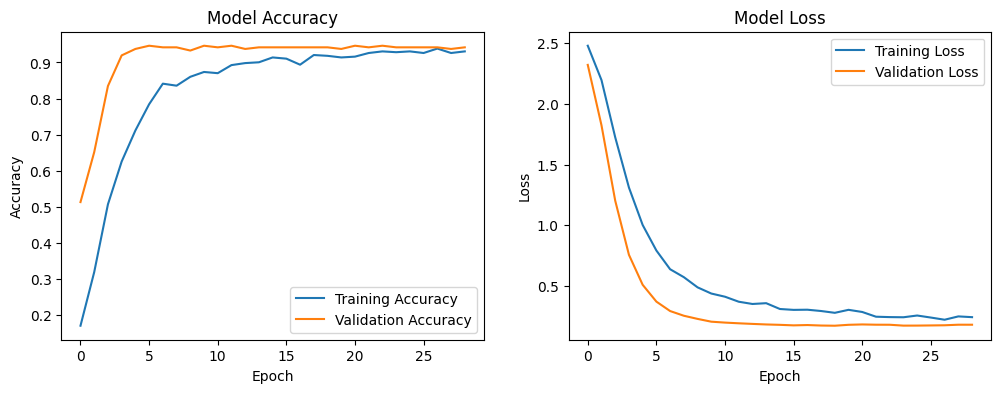

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Fungsi untuk mengubah input string gejala menjadi vektor gejala
def symptoms_string_to_vector(symptoms_string):
    symptoms_list = [s.strip() for s in symptoms_string.split(',') if s.strip()]
    symptom_vector = [0] * len(all_symptoms)
    for symptom in symptoms_list:
        symptom = symptom.replace('_', ' ') # Ganti underscore dengan spasi
        if symptom in all_symptoms:
            symptom_vector[all_symptoms.index(symptom)] = 1
    return np.array([symptom_vector])

# Ambil input gejala dari user
user_symptoms_input = input("Masukkan gejala yang dipisahkan dengan koma (gunakan underscore '_' untuk spasi): ")

# Ubah input user menjadi vektor
user_symptom_vector = symptoms_string_to_vector(user_symptoms_input)

# Lakukan prediksi menggunakan model
prediction = model.predict(user_symptom_vector)

# Dapatkan kelas prediksi (penyakit)
predicted_class_index = np.argmax(prediction)
predicted_disease = le.inverse_transform([predicted_class_index])[0]

print(f"\nBerdasarkan gejala yang Anda masukkan, kemungkinan penyakitnya adalah: {predicted_disease}")

Masukkan gejala yang dipisahkan dengan koma (gunakan underscore '_' untuk spasi): continuous sneezing, chills,fatigue,cough,headache
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Berdasarkan gejala yang Anda masukkan, kemungkinan penyakitnya adalah: Bronchial Asthma


In [ ]:
df_augmented.head(200)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Allergy,chills,continuous_sneezing,shivering,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none
1,Allergy,chills,shivering,continuous_sneezing,none,none,none,none,none,none,none,none,none,none,none,none,none
2,Allergy,shivering,chills,none,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Allergy,continuous_sneezing,watering_from_eyes,shivering,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Allergy,shivering,chills,watering_from_eyes,none,none,none,none,none,none,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Bronchial Asthma,cough,mucoid_sputum,family_history,high_fever,breathlessness,fatigue,none,none,none,none,none,none,none,none,none,none
196,Bronchial Asthma,mucoid_sputum,high_fever,family_history,cough,breathlessness,fatigue,none,none,none,none,none,none,none,none,none,none
197,Bronchial Asthma,high_fever,fatigue,none,none,none,none,none,none,none,none,none,none,none,none,none,none
198,Bronchial Asthma,family_history,high_fever,fatigue,none,none,none,none,none,none,none,none,none,none,none,none,none


In [ ]:
print("Gejala yang dikenali oleh model:")
print(all_symptoms)

Gejala yang dikenali oleh model:
['abdominal_pain', 'acidity', 'altered_sensorium', 'back_pain', 'belly_pain', 'bladder_discomfort', 'blood_in_sputum', 'blurred_and_distorted_vision', 'breathlessness', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'depression', 'diarrhoea', 'excessive_hunger', 'family_history', 'fast_heart_rate', 'fatigue', 'foul_smell_of urine', 'headache', 'high_fever', 'indigestion', 'irritability', 'joint_pain', 'loss_of_appetite', 'loss_of_smell', 'malaise', 'mild_fever', 'mucoid_sputum', 'muscle_pain', 'nausea', 'obesity', 'pain_behind_the_eyes', 'phlegm', 'prominent_veins_on_calf', 'red_spots_over_body', 'redness_of_eyes', 'runny_nose', 'rusty_sputum', 'shivering', 'sinus_pressure', 'skin_rash', 'stiff_neck', 'sweating', 'swelled_lymph_nodes', 'swollen_blood_vessels', 'swollen_legs', 'throat_irritation', 'toxic_look_(typhos)', 'visual_disturbances', '

In [ ]:
all_symptoms

['abdominal_pain',
 'acidity',
 'altered_sensorium',
 'back_pain',
 'belly_pain',
 'bladder_discomfort',
 'blood_in_sputum',
 'blurred_and_distorted_vision',
 'breathlessness',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'depression',
 'diarrhoea',
 'excessive_hunger',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'indigestion',
 'irritability',
 'joint_pain',
 'loss_of_appetite',
 'loss_of_smell',
 'malaise',
 'mild_fever',
 'mucoid_sputum',
 'muscle_pain',
 'nausea',
 'obesity',
 'pain_behind_the_eyes',
 'phlegm',
 'prominent_veins_on_calf',
 'red_spots_over_body',
 'redness_of_eyes',
 'runny_nose',
 'rusty_sputum',
 'shivering',
 'sinus_pressure',
 'skin_rash',
 'stiff_neck',
 'sweating',
 'swelled_lymph_nodes',
 'swollen_blood_vessels',
 'swollen_legs',
 'throat_irritation',
 'toxic_look_(typhos)',
 '

In [ ]:
import joblib
# Save symptoms to JSON file
with open('general_symptoms.json', 'w') as f:
    json.dump(all_symptoms, f, indent=4)
print("Symptoms saved to general_symptoms.json")

# Save model
model.save("general_disease_model.h5")
print("Model saved to general_disease_model.h5")

# Save LabelEncoder
joblib.dump(le, "general_label_encoder.pkl")
print("LabelEncoder saved to general_label_encoder.pkl")

Symptoms saved to general_symptoms.json
Model saved to general_disease_model.h5
LabelEncoder saved to general_label_encoder.pkl
